In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
dft = pd.read_csv("./train.csv")
print(dft.shape)
print(dft.columns)
print(dft.dtypes)

(3000, 23)
Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title              

In [3]:
for i in dft.columns:
    print(i+" : ")
    print(dft[i][0])
    print("\n")

id : 
1


belongs_to_collection : 
[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]


budget : 
14000000


genres : 
[{'id': 35, 'name': 'Comedy'}]


homepage : 
nan


imdb_id : 
tt2637294


original_language : 
en


original_title : 
Hot Tub Time Machine 2


overview : 
When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.


popularity : 
6.575392999999999


poster_path : 
/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg


production_companies : 
[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]


production_countries : 
[{'iso_3166_1': 'US', 'name': 'United States of America'}]


release_date : 
2/20/15


runtime : 
93.0


spoken_languages : 
[{'iso_639_1': 'en', 'name': 'English'}]


status : 
Released


t

In [4]:
import ast

features_list = ['belongs_to_collection','genres','production_companies',
                 'production_countries','spoken_languages','Keywords','cast','crew']
dft[features_list] = dft[features_list].fillna('NA').copy()

def strToList(x):
    m = re.findall(r'\{.*\}',x)
    if m:
        l = list()
        for i in m:
            tmp = ast.literal_eval(i)
            l.append(tmp)
        return l
    else:
        return None

for i in features_list:
    dft[i+"_v2"]=dft[i].apply(lambda x:strToList(x))

In [5]:
dft.dtypes

id                            int64
belongs_to_collection        object
budget                        int64
genres                       object
homepage                     object
imdb_id                      object
original_language            object
original_title               object
overview                     object
popularity                  float64
poster_path                  object
production_companies         object
production_countries         object
release_date                 object
runtime                     float64
spoken_languages             object
status                       object
tagline                      object
title                        object
Keywords                     object
cast                         object
crew                         object
revenue                       int64
belongs_to_collection_v2     object
genres_v2                    object
production_companies_v2      object
production_countries_v2      object
spoken_languages_v2         

In [6]:
dft.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,crew,revenue,belongs_to_collection_v2,genres_v2,production_companies_v2,production_countries_v2,spoken_languages_v2,Keywords_v2,cast_v2,crew_v2
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'id': 35, 'name': 'Comedy'}]","[({'name': 'Paramount Pictures', 'id': 4}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[({'id': 4379, 'name': 'time travel'}, {'id': ...","[({'cast_id': 4, 'character': 'Lou', 'credit_i...","[({'credit_id': '59ac067c92514107af02c8c8', 'd..."
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[{'id': 107674, 'name': 'The Princess Diaries ...","[({'id': 35, 'name': 'Comedy'}, {'id': 18, 'na...","[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[({'id': 2505, 'name': 'coronation'}, {'id': 4...","[({'cast_id': 1, 'character': 'Mia Thermopolis...","[({'credit_id': '52fe43fe9251416c7502563d', 'd..."
2,3,NA,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,"[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,None,"[{'id': 18, 'name': 'Drama'}]","[({'name': 'Bold Films', 'id': 2266}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]","[({'id': 1416, 'name': 'jazz'}, {'id': 1523, '...","[({'cast_id': 5, 'character': 'Andrew Neimann'...","[({'credit_id': '54d5356ec3a3683ba0000039', 'd..."
3,4,NA,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,"[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,None,"[({'id': 53, 'name': 'Thriller'}, {'id': 18, '...",None,"[{'iso_3166_1': 'IN', 'name': 'India'}]","[({'iso_639_1': 'en', 'name': 'English'}, {'is...","[({'id': 10092, 'name': 'mystery'}, {'id': 105...","[({'cast_id': 1, 'character': 'Vidya Bagchi', ...","[({'credit_id': '52fe48779251416c9108d6eb', 'd..."
4,5,NA,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,None,"[({'id': 28, 'name': 'Action'}, {'id': 53, 'na...",None,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]","[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",None,"[({'cast_id': 3, 'character': 'Chun-soo', 'cre...","[({'credit_id': '52fe464b9251416c75073b43', 'd..."


## Features engineering
### Films genres

In [7]:
gen_count = dict()

def aux(d_count, l):
    if not l is None:
        for i in l:
            if type(i) is tuple:
                for j in i:
                    d=dict(j)
                    if d['name'] in d_count.keys():
                        d_count[d['name']] += 1
                    else:
                        d_count[d['name']] =1
            else:
                d = i
                if d['name'] in d_count.keys():
                    d_count[d['name']] += 1
                else:
                    d_count[d['name']] =1

dft['genres_v2'].apply(lambda x: aux(gen_count,x))
    
print(gen_count)


{'Comedy': 1028, 'Drama': 1531, 'Family': 260, 'Romance': 571, 'Thriller': 789, 'Action': 741, 'Animation': 141, 'Adventure': 439, 'Horror': 301, 'Documentary': 87, 'Music': 100, 'Crime': 469, 'Science Fiction': 290, 'Mystery': 225, 'Foreign': 31, 'Fantasy': 232, 'War': 100, 'Western': 43, 'History': 132, 'TV Movie': 1}


In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
import random

g = list()
g_part = list()

for x in gen_count.keys():
    g.append(x)
    g_part.append((gen_count[x]/dft.shape[0])*100)
    
def gen_list_random_colors(x):
    l = list()
    for i in range(x):
        a = random.uniform(0,1)
        if a in l:
            a = random.uniform(0,1)
        else:
            l.append(a)
    return l
    

c =list(cm.rainbow(gen_list_random_colors(len(g))))

fig1, ax1 = plt.subplots()
ax1.barh(g,g_part,color=c)
plt.ylabel('Films genres')
plt.xlabel("% of the dataset")
plt.show()


<Figure size 640x480 with 1 Axes>

#### Creation of variables type of films which is a list with the different types of the films

In [9]:
def aux2(l):
    l_g = list()
    if not l is None:
        for i in l:
            if type(i) is tuple:
                for j in i:
                    d=dict(j)
                    if not d['name'] in l_g:
                        l_g.append(d['name'])
                    else:
                        pass
            else:
                d=i
                if not d['name'] in l_g:
                        l_g.append(d['name'])
                else:
                    pass
        return l_g
    else: 
        return []
    
dft['genre_film'] = dft['genres_v2'].apply(lambda x: aux2(x))
dft['genre_film'].head()

0                            [Comedy]
1    [Comedy, Drama, Family, Romance]
2                             [Drama]
3                   [Thriller, Drama]
4                  [Action, Thriller]
Name: genre_film, dtype: object

In [10]:
print(len(g))

20


In [11]:
def indic_var(x,c):
    if c in x:
        return 1
    else:
        return 0
        
for i in g:
    dft["genre_"+i] = dft['genre_film'].apply(lambda x: indic_var(x,i))

dft.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,genre_Music,genre_Crime,genre_Science Fiction,genre_Mystery,genre_Foreign,genre_Fantasy,genre_War,genre_Western,genre_History,genre_TV Movie
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,0,0,0,0,0,0
2,3,NA,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,0,0,0,0,0,0,0
3,4,NA,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0,0,0,0,0,0,0,0,0,0
4,5,NA,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,0,0,0,0,0,0,0,0,0


### Production_companies

In [12]:
prod_count = dict()

dft['production_companies_v2'].apply(lambda x: aux(prod_count,x))
c = 0
for k,v in prod_count.items():
    if c>6:
        break
    print(k+" "+str(v))
    c+=1

Paramount Pictures 161
United Artists 44
Metro-Goldwyn-Mayer (MGM) 84
Walt Disney Pictures 62
Bold Films 4
Blumhouse Productions 18
Right of Way Films 4


#### Company production name sorted by alphabetical order

In [13]:
l2_tmp = list(prod_count.keys())
l2_tmp.sort()
for i in l2_tmp:
    if prod_count[i]>4:
        print(i)

1492 Pictures
2929 Productions
3 Arts Entertainment
40 Acres & A Mule Filmworks
A24
Alcon Entertainment
Allied Filmmakers
Alphaville Films
Amblin Entertainment
American Zoetrope
Annapurna Pictures
Anonymous Content
Apatow Productions
Appian Way
Arte France Cinéma
Artisan Entertainment
Atlas Entertainment
BBC Films
BIM Distribuzione
Bad Hat Harry Productions
Baltimore Pictures
Bel Air Entertainment
BenderSpink
Big Screen Productions
Blinding Edge Pictures
Blue Sky Studios
Blumhouse Productions
Brandywine Productions
British Film Institute (BFI)
CBS Films
CJ Entertainment
Canal Plus
Canal+
Canal+ España
Cannon Group
Capitol Films
Carolco Pictures
Castle Rock Entertainment
Centre National de la Cinématographie (CNC)
Centropolis Entertainment
Channel Four Films
Chernin Entertainment
Cheyenne Enterprises
Cinergi Pictures Entertainment
Ciné+
CinéCinéma
Columbia Pictures
Columbia Pictures Corporation
Constantin Film
Constantin Film Produktion
Cross Creek Pictures
Cruise/Wagner Productions
DC 

#### Company production sorted by alphabetical order with more than 30 films:

In [14]:
def aux3(x,d1,d2):
    r = str.split(x," ")
    k = r[0]
    if "The" in r:
        k = k+" "+r[1]
    if k in d2.keys():
        d2[k]+=d1[x]
    else:
        d2[k]=d1[x]

best_prod = dict()
for i in l2_tmp:
    aux3(i,prod_count,best_prod)

best_company = list()
for k,v in best_prod.items():
    if v>30:
        best_company.append(k)
        print(k+" "+str(v))

BBC 34
Canal+ 61
Columbia 157
DreamWorks 41
Dune 46
Film 40
Fox 65
Metro-Goldwyn-Mayer 85
Miramax 49
New 120
Paramount 170
Regency 31
Relativity 48
Studio 34
Touchstone 63
TriStar 53
Twentieth 150
United 45
Universal 207
Village 36
Walt 83
Warner 230


In [15]:
def aux3(l1,l2):
    l3 = list()
    if len(l1)>0:
        for i in l1:
            tmp = str.split(i," ")
            if tmp[0]=="The":
                if (tmp[0]+" "+tmp[1]) in l2:
                    l3.append(tmp[0]+" "+tmp[1])
            else:
                if tmp[0] in l2:
                    l3.append(tmp[0])
        return l3
    else:
        return l3
    
    
dft['best_prod'] = dft['production_companies_v2'].apply(lambda x: aux3(aux2(x),best_company))
dft['best_prod'].head(10)

0    [Paramount, United, Metro-Goldwyn-Mayer]
1                                      [Walt]
2                                          []
3                                          []
4                                          []
5                                          []
6                                          []
7                                          []
8                                      [Walt]
9                                          []
Name: best_prod, dtype: object

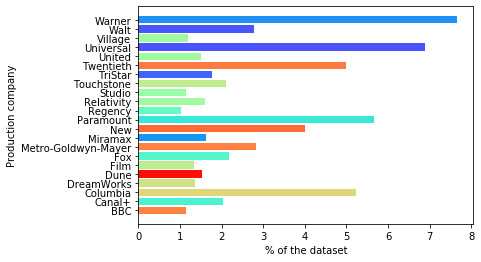

In [16]:
g = list()
g_part = list()

best_company.sort()
for x in best_company:
    g.append(x)
    g_part.append((best_prod[x]/dft.shape[0])*100)

c =list(cm.rainbow(gen_list_random_colors(len(g))))

fig1, ax1 = plt.subplots()
ax1.barh(g,g_part,color=c)
plt.ylabel('Production company')
plt.xlabel("% of the dataset")
plt.show()

In [17]:
print(len(g))

22


In [18]:
for i in g:
    dft["prod_"+i] = dft['best_prod'].apply(lambda x: indic_var(x,i))

dft.head()
    

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,prod_Relativity,prod_Studio,prod_Touchstone,prod_TriStar,prod_Twentieth,prod_United,prod_Universal,prod_Village,prod_Walt,prod_Warner
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,0,1,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,0,0,0,0,1,0
2,3,NA,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,0,0,0,0,0,0,0
3,4,NA,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0,0,0,0,0,0,0,0,0,0
4,5,NA,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,0,0,0,0,0,0,0,0,0


### Spoken Languages

In [19]:
lang_count = dict()
dft['spoken_languages_v2'].apply(lambda x: aux(lang_count,x))
c = 0
for k,v in lang_count.items():
    if c>6:
        break
    print(k+" "+str(v))
    c+=1

English 2618
हिन्दी 56
한국어/조선말 37
العربية 40
Pусский 152
svenska 22
Srpski 4


In [20]:
print("Number of languages : "+str(len(lang_count.keys())))

Number of languages : 56


In [21]:
lang_dsort = dict()
tmp = list(lang_count.values())
tmp1 = list(lang_count.keys())
while max(tmp)>5:
    ind = tmp.index(max(tmp))
    lang_dsort[tmp1[ind]] = max(tmp)
    tmp.remove(tmp[ind])
    tmp1.remove(tmp1[ind])
    
c = 0
for k,v in lang_dsort.items():
    if c>14:
        break
    print(k+" "+str(v))
    c+=1

English 2618
Français 288
Español 239
Deutsch 169
Pусский 152
Italiano 124
日本語 89
普通话 68
हिन्दी 56
 47
Português 43
العربية 40
한국어/조선말 37
广州话 / 廣州話 36
தமிழ் 27


/home/djebali/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/djebali/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2367 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/djebali/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/djebali/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/djebali/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 2342 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/djebali/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.p

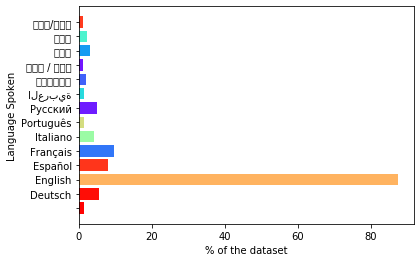

In [22]:
g = list()
g_part = list()

tmp = list(lang_dsort.values())
tmp1 = list(lang_dsort.keys())
tmp1.sort()

for x in tmp1:
    if lang_dsort[x]>30:
        g.append(x)
        g_part.append((lang_dsort[x]/dft.shape[0])*100)
    

c =list(cm.rainbow(gen_list_random_colors(len(g))))

fig1, ax1 = plt.subplots()
ax1.barh(g,g_part,color=c)
plt.ylabel('Language Spoken')
plt.xlabel("% of the dataset")
plt.show()